# Take Home Exam

## Overview

In [4]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [5]:
%matplotlib inline

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
cd = pd.read_csv('complications.csv', dtype=str).rename(columns=lambda x: x.strip())

This dataset contains complications in U.S. hospitals. Each observation represents the number of complications and the 30-day death rate for a specific complication in a specific hospital.

** A quick overview of the dataset: **

In [9]:
cd.describe()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
count,272788,272788,272788,272788,272788,272626,272788,272788,272788,272788,272788,272788,272788,272788
unique,4746,5119,4915,2874,4368,1526,5028,6,26,26,23771,6373,8690,11699
top,270012,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,76104,LOS ANGELES,6104022273,2013,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,26.0,0.06,0.0,0.06
freq,89,710,378,1957,353,5421,178,58668,24942,24942,1435,2947,23907,2897


# Transform relevant columns

All columns in the dataset are of type `str` (to preserve the ZIP code information). For **five** columns, str is the wrong type. Change the columns and explain why you changed which column.

### The columns that can be transformed are - Denominator,Score,Lower Estimate,Higher Estimate and Phone Number	

Here the Data in the respective columns are to be converted from string to Numeric types. So, astype() is used and the type of value to be converted to is given as the parameter. astype() is efficient and completes the conversion in microseconds.

** Phone Number is of the type str but it is a number and hence it is converted to int.**

In [11]:
cd['Phone Number'] = cd['Phone Number'].astype(int)

** Denominator is of the type str but it should be of type float.**

In [12]:
cd['Denominator'] = cd['Denominator'].astype(float)

**Score is of the type str but it should be of type float.**

In [13]:
cd['Score'] = cd['Score'].astype(float)

**Lower Estimate is of the type str but it should be of type float.**

In [14]:
cd['Lower Estimate'] = cd['Lower Estimate'].astype(float)

**Higher Estimate is of the type str but it should be of type float.**

In [15]:
cd['Higher Estimate'] = cd['Higher Estimate'].astype(float)

# Create a ratio between the score and the denominator

A new column **'Ratio'** is created in the Dataframe to hold the results of all the score/denominator respectively.

In [16]:
cd['Ratio'] = cd['Score']/cd['Denominator']

# Create an overview of the ratio for deathly complications

0. **Be careful when you identify 'deathly' complications and make sure that you catch all of them.**
1. Create the overview (Make sure that the overview is understandable to everyone.)
2. Choose an appropriate measure to aggregate the data. **Ignore that the data is for multiple years**.
2. Sort with the highest ratio on top.

Here, it is better to store all the resultant values in a New Dataframe because, later we would need to perform analysis on the same.

The deathly complications are determined by the words **'Death','Deaths' and 'Mortality'**, so the new dataframe will only contain the values based on these measure names.

**str.contains()** is used to determine if the Measure Name contains any of the deathly complications.

In [17]:
newDF = cd[(cd['Measure Name'].str.contains('Death')) | (cd['Measure Name'].str.contains('Deaths')) | (cd['Measure Name'].str.contains('Mortality'))]

The describe() of Pandas is used to give an overview of the Dataframe. It mainly gives the numerical overview of the Dataframe and hence it is used on the Ratio column of the Dataframe.

The dataframe is grouped by using the groupby() to concentrate on the 'deathly complications' and the decribe function is used to decribe the 'Ratio' values of these **'deathly complications'.**

The Ratio here refers to the ratio calculated above **(Score/Denominator).**

In [18]:
newDF.groupby('Measure Name')['Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
Measure Name,,,,,,,,
Acute Myocardial Infarction (AMI) 30-Day Mortality Rate,14817.0000,0.1599,0.1452,0.0068,0.0522,0.1020,0.2246,0.6680
Death rate for CABG,3102.0000,0.0415,0.0308,0.0016,0.0177,0.0337,0.0560,0.1750
Death rate for chronic obstructive pulmonary disease (COPD) patients,21738.0000,0.0833,0.0751,0.0028,0.0275,0.0536,0.1177,0.3640
Death rate for stroke patients,16593.0000,0.1848,0.1613,0.0070,0.0594,0.1179,0.2740,0.7000
Deaths among Patients with Serious Treatable Complications after Surgery,7515.0000,0.5244,0.2329,0.1132,0.3159,0.4935,0.7134,0.9997
Heart failure (HF) 30-Day Mortality Rate,22275.0000,0.1217,0.1201,0.0033,0.0319,0.0719,0.1762,0.6360
Pneumonia (PN) 30-Day Mortality Rate,24942.0000,0.1159,0.1169,0.0044,0.0355,0.0717,0.1505,0.7520


## Visualizing the Data :

It is always better to Visualize the data because, people understand visuals easily and hence the mean of Ratio's for different **'Deathly Complications'** is plotted as a bar graph. From this, it can be seen clearly that the **'Deaths among Patients with Serious Treatable Complications after Surgery'** has the highest average ratio.

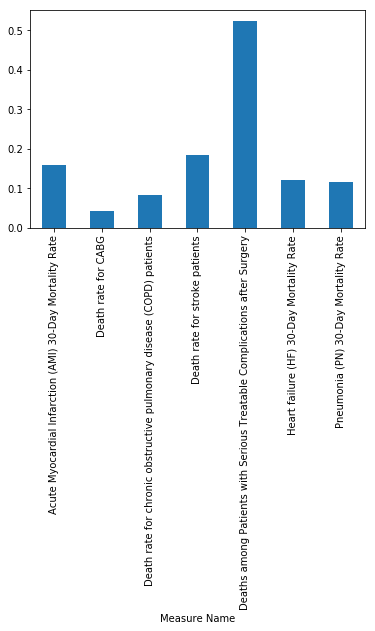

In [19]:
newDF.groupby('Measure Name')['Ratio'].mean().plot.bar()

## Data Aggregation :

Here, the data is aggregated using the .agg function on the newly created dataframe. We use the agg() to display the sum,mean and count of the Deathly complications based on their **Ratio(Score/Denominator)**.

In [20]:
newDF.groupby('Measure Name').agg({'Ratio':['sum','mean','count']})

Ratio              
                                                         sum   mean  count
Measure Name                                                              
Acute Myocardial Infarction (AMI) 30-Day Mortal... 2368.8504 0.1599  14817
Death rate for CABG                                 128.7628 0.0415   3102
Death rate for chronic obstructive pulmonary di... 1811.6615 0.0833  21738
Death rate for stroke patients                     3065.6770 0.1848  16593
Deaths among Patients with Serious Treatable Co... 3940.9193 0.5244   7515
Heart failure (HF) 30-Day Mortality Rate           2711.3264 0.1217  22275
Pneumonia (PN) 30-Day Mortality Rate               2889.6519 0.1159  24942

It is always better to Visualize the data because, people understand visuals easily and hence the mean of Ratio's for different **'Deathly Complications'** is plotted as a bar graph. From this, it can be seen clearly that the **'Deaths among Patients with Serious Treatable Complications after Surgery'** has the highest total ratio.

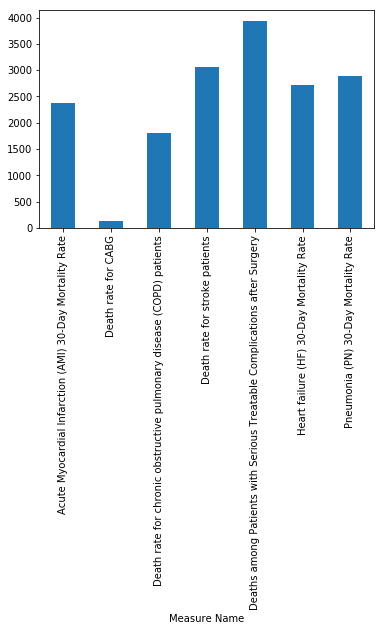

In [21]:
newDF.groupby('Measure Name')['Ratio'].sum().plot.bar()

## Sort by 'Ratio' :

Finally, the dataframe is sorted based on the **'Ratio'** of the number of complications and the number of underlying medical procedures **(Score/Denominator)**.  

**Note : It is assumed that the sorting needs to be done for the **'Ratio'** of the entire dataframe and not on the grouped values of the Measure Names(mean or sum).**

For grouped values, the following code could be used for sorting based on the sum() and mean() values of the grouped elements

**newDF.groupby('Measure Name')['Ratio'].mean().sort_values(ascending=False)**

**newDF.groupby('Measure Name')['Ratio'].sum().sort_values(ascending=False)**

In [22]:
newDF = newDF.sort_values(by='Ratio',ascending=False)

# Identify the five safest hospitals

Return a **list** with the hospitals that have, on average, the lowest rate of deadly complications. **Be careful when you identify 'deathly' complications.** (Again, ignore that the dataset covers multiple years).

## Top 5 Safest Hospitals :

The average is found for the 'Ratio' found based on the 'Hospitals'.
From these, the smallest values are considered to be the safest hospitals.

** Note - The rate of 'deathly complications' is assumed here to be the 'Ratio' between Score and Denominator calculated above.**

In [23]:
newDF.groupby('Hospital Name')['Ratio'].mean().nsmallest(5)

Hospital Name
UNIVERITY OF MD BALTO WASHINGTON  MEDICAL CENTER   0.0206
NEW YORK-PRESBYTERIAN HOSPITAL                     0.0220
NORTON HOSPITALS, INC                              0.0226
SAN JUAN VA MEDICAL CENTER                         0.0240
FLORIDA HOSPITAL                                   0.0256
Name: Ratio, dtype: float64

# Augment the datset with information about the state

Read the file `geo-data.csv` into an object `zip_codes`. **Make sure that you read all columns as string.** ([Link](https://github.com/scpike/us-state-county-zip))

In [24]:
zip_codes = pd.read_csv('geo-data.csv', dtype=str).rename(columns=lambda x: x.strip())

This file contains information about the relationship of zip codes, counties, and U.S. states. 

1. Combine the dataset on complications with the dateset on zip codes.
2. Explain why you chose the column that used to combine the datasets.
3. **Do not worry, not all states will be matched.**

## Merging the Dataframes :

The Dataframes need to be merged together. This merge can be done in two possible ways, either on the County Name or on the ZIP Code. Here, ZIP Code is chosen as the merge column, because in both the dataframes, Zip codes are numbers but in string format and can be used to merge, whereas the County names in the cd dataframe are with First letter captial and rest are small and in the Zip_Code dataframe, the county names are in all capitals, so there must be a conversion before the comparision can actually be made. 

In [25]:
zip_codes.rename(columns={'zipcode':'ZIP Code'}, inplace = True)

For the merge to take place, the column name of both the dataframes on which the merge is to take place needs to be similar.

The Dataframes merged are stored in a new Dataframe called 'new3'.

First, the newDF and zip_codes dataframes need to be merged and the merge() function available in Pandas is used to achieve this and 'left' join is used to merge these dataframes because we need to match all the values of the zip_codes dataframe to the values of deathly complications.

In [26]:
new3 = pd.merge(newDF,zip_codes,on='ZIP Code',how='left')

# Create an overview of the complications per U.S. state

* Return a sorted list with the overall complication rate per state. 
* Ignore that the data is for multiple years. 
* Focus on the **best** ten states.

The states with the lowest overall complication rate could be found using the **sum()** of all the **'Ratio'** values grouped by the respective states and is as follows.

In [27]:
new3.groupby('state')['Ratio'].sum().nsmallest(10)

state
Delaware                18.1198
District of columbia    26.1058
Hawaii                  65.2985
Alaska                  66.0765
Wyoming                 94.2385
Maryland               107.0787
North dakota           116.3674
Idaho                  122.4943
Nevada                 128.6266
South dakota           133.6957
Name: Ratio, dtype: float64

# Create an overview of the change in complications across U.S. states

* Focus on the deadly complications only.
* Calculate the change as follows: **(average rate for last year in dataset - average rate for first year in dataset)/(average rate for first year in dataset)**

### Overview of the Dataframe :

Here, we need to focus on the deathly complications alone, so the Dataframe new3, which already has data related to the deathly complications and also has the state information as stated above, is used. 



**Which state has improved the most?**

According to the Formula given above, we could use the **average 'Ratio'** of deathly complications based on each state for the first and last years to arrive at which state has improved the most. Since the average is supposed to be mean of the 'Ratio' values, we use the mean() function.

Here, we know based on the **'Year'** column of the Dataframe, the minimum and maximum values are **2011 and 2016** respectively.

So, here either the year could be har coded to find the values or it could be found using the **min() and max()** functions to find the first and last year automatically.

In [176]:
((new3[new3 ['Year'] == '2016'].groupby('state')['Ratio'].mean() - new3[new3 ['Year'] == '2011'].groupby('state')['Ratio'].mean())/(new3[new3 ['Year'] == '2011'].groupby('state')['Ratio'].mean())).nsmallest(1)

state
Delaware   -0.1874
Name: Ratio, dtype: float64

In [182]:
((new3[new3 ['Year'] == new3['Year'].max()].groupby('state')['Ratio'].mean() - new3[new3['Year'] == new3['Year'].min()].groupby('state')['Ratio'].mean())/(new3[new3['Year'] == new3 ['Year'].min()].groupby('state')['Ratio'].mean())).nsmallest(1)

state
Delaware   -0.1874
Name: Ratio, dtype: float64

**Which state has the worst development?**

According to the Formula given above, we could use the **average 'Ratio'** of deathly complications based on each state for the first and last years to arrive at which state has improved the worst. Since the average is supposed to be mean of the 'Ratio' values, we use the mean() function.

Here, we know based on the **'Year'** column of the Dataframe, the minimum and maximum values are **2011 and 2016** respectively.

In [28]:
((new3[new3 ['Year'] == new3['Year'].max()].groupby('state')['Ratio'].mean() - new3[new3 ['Year'] == new3['Year'].min()].groupby('state')['Ratio'].mean())/(new3[new3 ['Year'] == new3['Year'].min()].groupby('state')['Ratio'].mean())).nlargest(1)

state
Wyoming   0.1061
Name: Ratio, dtype: float64

# Bonus

** Which state has the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'? **

Here, the dataframe which already has only the values of 'deathly complications' is to be used. Now, since the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery' is to be calculated, the dataframe could be filtered based on this Measure Name and the values could be stored in a New Dataframe for better understanding. 

The new Dataframe new4 consists of 'Deaths among Patients with Serious Treatable Complications after Surgery' alone, using the first and last year found using the **max() and min()** functions(because, unlike the previous problem, the first and last years are different here) and using the same formula as above with the **mean()** of these values, the Worst Development for the measure can be calculated. The nlargest() function will give the largest value which is the state with the Worst Development of the give Measure Name. 

** Note - Here, a creating a new Dataframe reduces the complexity and improves the understandability of the code as the code for formula is long**

In [161]:
searchStr = 'Deaths among Patients with Serious Treatable Complications after Surgery'

In [167]:
new4 = new3[new3['Measure Name'] == searchStr]

In [184]:
((new4[new4 ['Year'] == new4['Year'].max()].groupby('state')['Ratio'].mean() - new4[new4 ['Year'] == new4['Year'].min()].groupby('state')['Ratio'].mean())/(new4[new4 ['Year'] == new4['Year'].min()].groupby('state')['Ratio'].mean())).nlargest(1)


state
Utah   0.2155
Name: Ratio, dtype: float64